# Actividad Evaluable: Obtención de estadisticas descriptivas 

## Fernando de Jesús Mendivil Terminel - A0023220

### Librerías usadas:

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### 1. Guardar el archivo (con los datos a usar) en una variable

In [11]:
# Leer los datos a analizar
diamantes = pd.read_csv("Diamonds are forever.csv", na_values=':')
print('shape: ', diamantes.shape)
diamantes.head(10)

shape:  (308, 5)


,Carat,Colour,Clarity,Lab,Price ($US)
0,0.30,1,5,1,911.4
1,0.30,2,4,1,1057.0
2,0.30,4,2,1,1057.0
3,0.30,4,4,1,882.0
4,0.31,1,4,1,1148.7
5,0.31,2,4,1,1088.5
6,0.31,3,4,1,998.9
7,0.31,4,3,1,998.9
8,0.31,5,5,1,788.2
9,0.31,6,4,1,788.2


In [12]:
diamantes.tail(10)

,Carat,Colour,Clarity,Lab,Price ($US)
298,1.01,4,3,3,6995.1
299,1.01,4,5,3,6505.1
300,1.01,5,3,3,6603.1
301,1.01,5,4,3,6407.1
302,1.01,6,2,3,6211.1
303,1.01,6,4,3,5722.5
304,1.02,3,3,3,7557.2
305,1.06,5,3,3,6923.0
306,1.02,5,5,3,6271.3
307,1.09,6,3,3,6374.9


### 2. Datos

#### 2.1 En el archivo "Diamonds are forever.csv", hay 308 filas y 5 columnas; en total, son 1540 datos

In [15]:
diamantes.count()

Carat          308
Colour         308
Clarity        308
Lab            308
Price ($US)    308
dtype: int64

#### 2.2 Aquí se puede observar que no hay datos nulos

In [13]:
diamantes.isnull().sum()

Carat          0
Colour         0
Clarity        0
Lab            0
Price ($US)    0
dtype: int64

#### 2.3 Valores máximos y mínimos para cada columna/variable

In [32]:
diamantes.max()

Carat              1.1
Colour             6.0
Clarity            5.0
Lab                3.0
Price ($US)    11205.6
dtype: float64

In [33]:
diamantes.min()

Carat            0.18
Colour           1.00
Clarity          1.00
Lab              1.00
Price ($US)    446.60
dtype: float64

#### Las variables del estudio de diamantes son las siguientes:
|Variable|Tipo|Descripción|
|--------|----|-----------|
|Carat|Cuantitativa|Peso del diamante en carats|
|Colour|Cualitativa|Valor numérico de la calidad del color; va de 1 (sin color) a 6 (casi sin color)|
|Clarity|Cualitativa|Valor numérico de la claridad; va de 1 (perfecto) a 5 (inclusiones muy pequeñas)|
|Lab|Cualitativa|Laboratorio que evaluó el diamante, en orden de 1 a 3: GEM=Gemological Institute of America, INT=International Gemmological Institute, DHC=Diamond High Council|
|Price ($US)|Cuantitativa|Valor del diamante|

In [79]:
diamantes.mean()

Carat             0.630909
Colour            3.750000
Clarity           3.152597
Lab               1.766234
Price ($US)    3513.638636
dtype: float64

In [80]:
diamantes.median()

Carat             0.62
Colour            4.00
Clarity           3.00
Lab               2.00
Price ($US)    2950.50
dtype: float64

In [81]:
diamantes.std()

Carat             0.277183
Colour            1.402360
Clarity           1.293718
Lab               0.833283
Price ($US)    2382.181001
dtype: float64

### 3. Gráficos

#### 3.1 Mapa de calor

<AxesSubplot:>

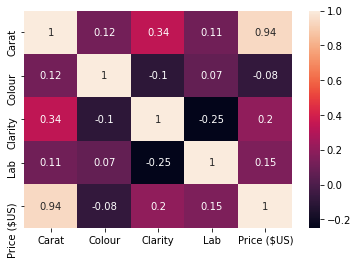

In [8]:
matriz_correlacion = diamantes.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True)

#### 3.2 Boxplots
Decidí hacer tres porque el rango del peso en carats y del precio en dólares estadounidenses eran muy diferentes, entonces hice uno para cada uno (Las variables Colour, Clarity y Lab tienen rangos similares, por lo que las deje en una misma figura).

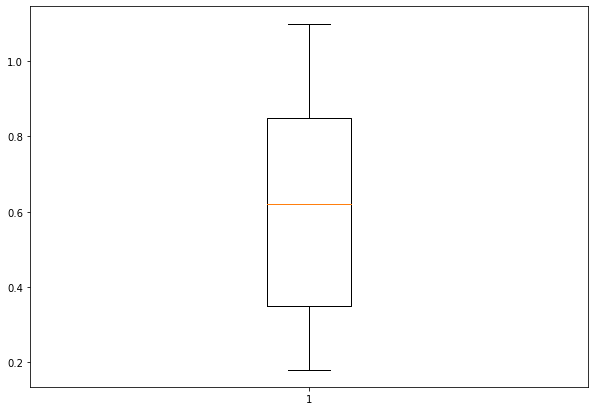

In [29]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(diamantes['Carat'])

plt.show()

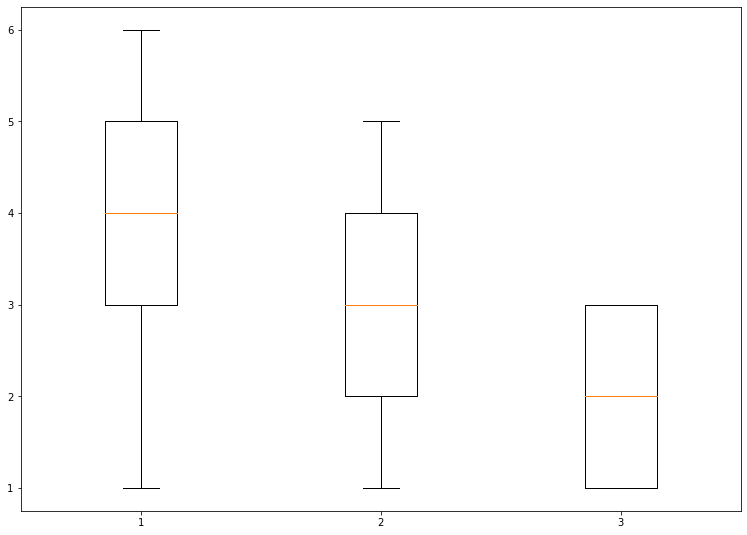

In [30]:
datos = [diamantes['Colour'],diamantes['Clarity'],diamantes['Lab']]

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])

box = ax.boxplot(datos)
plt.show()

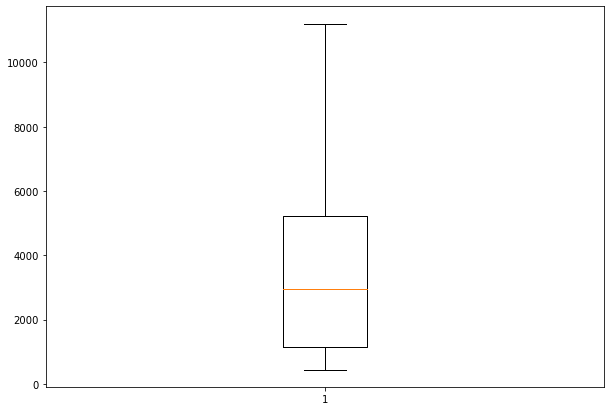

In [27]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(diamantes['Price ($US)'])

plt.show()

#### 3.3 Histogramas
De datos cualitativos.

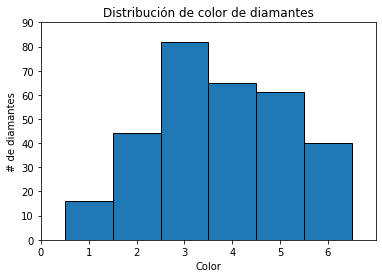

In [71]:
colores = diamantes['Colour']
histogram = Counter(min(color // 1 * 1, 6) for color in colores)

plt.bar([x for x in histogram.keys()],  # Desplazar por 5 las barras a la derecha
        histogram.values(),                 # Darle la altura correcta a cada barra
        1,                                 # Darle un ancho de 10 a cada barra
        edgecolor=(0, 0, 0))                # Líneas negras para cada barra

plt.axis([0, 7, 0, 90])                  # Eje x desde -5 a 105,
                                           # Eje y desde 0 a 5

plt.xticks([i for i in range(7)])    # Etiquetas de X de 0, 10, ..., 100
plt.xlabel("Color")                        # Etiqueta del eje x
plt.ylabel("# de diamantes")             # Etiqueta del eje y
plt.title("Distribución de color de diamantes")# Título del histograma
plt.show()

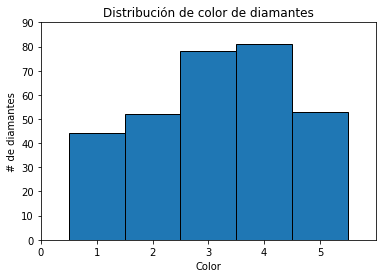

In [73]:
claridades = diamantes['Clarity']
histogram = Counter(min(claridad // 1 * 1, 5) for claridad in claridades)

plt.bar([x for x in histogram.keys()],  # Desplazar por 5 las barras a la derecha
        histogram.values(),                 # Darle la altura correcta a cada barra
        1,                                 # Darle un ancho de 10 a cada barra
        edgecolor=(0, 0, 0))                # Líneas negras para cada barra

plt.axis([0, 6, 0, 90])                  # Eje x desde -5 a 105,
                                           # Eje y desde 0 a 5

plt.xticks([i for i in range(6)])    # Etiquetas de X de 0, 10, ..., 100
plt.xlabel("Color")                        # Etiqueta del eje x
plt.ylabel("# de diamantes")             # Etiqueta del eje y
plt.title("Distribución de color de diamantes")# Título del histograma
plt.show()

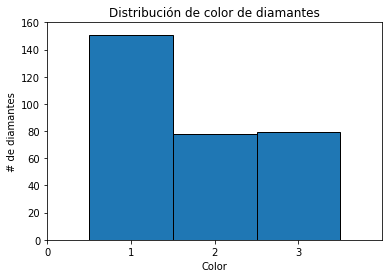

In [78]:
labs = diamantes['Lab']
histogram = Counter(min(lab // 1 * 1, 5) for lab in labs)

plt.bar([x for x in histogram.keys()],  # Desplazar por 5 las barras a la derecha
        histogram.values(),                 # Darle la altura correcta a cada barra
        1,                                 # Darle un ancho de 10 a cada barra
        edgecolor=(0, 0, 0))                # Líneas negras para cada barra

plt.axis([0, 4, 0, 160])                  # Eje x desde -5 a 105,
                                           # Eje y desde 0 a 5

plt.xticks([i for i in range(4)])    # Etiquetas de X de 0, 10, ..., 100
plt.xlabel("Color")                        # Etiqueta del eje x
plt.ylabel("# de diamantes")             # Etiqueta del eje y
plt.title("Distribución de color de diamantes")# Título del histograma
plt.show()